In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

In [218]:
data = pd.read_csv("cookie_cats.csv")

In [219]:
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [220]:
data.shape

(90189, 5)

In [221]:
data.info() # no duplicate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [222]:
data.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [223]:
data.dtypes #schema is ok

userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

In [224]:
data["userid"].unique # each row is unique user

<bound method Series.unique of 0            116
1            337
2            377
3            483
4            488
          ...   
90184    9999441
90185    9999479
90186    9999710
90187    9999768
90188    9999861
Name: userid, Length: 90189, dtype: int64>

In [225]:
data.isna().sum() # no null values

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [226]:
data["sum_gamerounds"].sort_values(ascending=False) # there is one outlier

57702    49854
7912      2961
29417     2640
43671     2438
48188     2294
         ...  
59687        0
23707        0
59670        0
59645        0
45094        0
Name: sum_gamerounds, Length: 90189, dtype: int64

In [227]:
data = data[data["sum_gamerounds"]< data["sum_gamerounds"].max()]

In [228]:
data.duplicated().sum() #no duplicate entries

0

In [229]:
data.isna().sum() #no null values

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [230]:
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [231]:
data = data.drop(columns=["userid"])

In [232]:
data.head()

,version,sum_gamerounds,retention_1,retention_7
0,gate_30,3,False,False
1,gate_30,38,True,False
2,gate_40,165,True,False
3,gate_40,1,False,False
4,gate_40,179,True,True


In [233]:
data["retention_1"] = data["retention_1"].astype(int)
data["retention_7"] = data["retention_7"].astype(int)

In [234]:
data.head()

,version,sum_gamerounds,retention_1,retention_7
0,gate_30,3,0,0
1,gate_30,38,1,0
2,gate_40,165,1,0
3,gate_40,1,0,0
4,gate_40,179,1,1


In [235]:
data.dtypes

version           object
sum_gamerounds     int64
retention_1        int32
retention_7        int32
dtype: object

In [236]:
data.shape

(90188, 4)

In [237]:
not_played = (data[data["sum_gamerounds"]==0].shape[0]/data.shape[0])*100
played = (data[data["sum_gamerounds"]!=0].shape[0]/data.shape[0])*100

<BarContainer object of 2 artists>

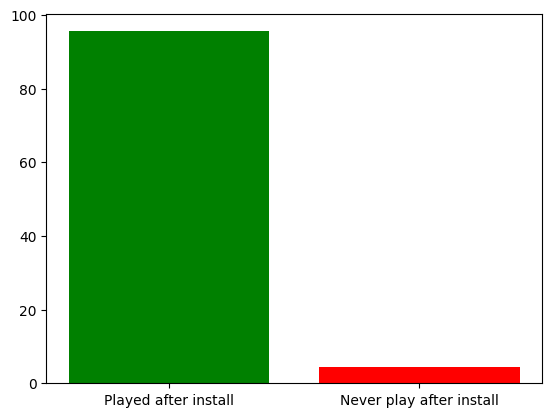

In [238]:
play_stat_labels = ["Played after install", "Never play after install"]
play_stat_values = [played, not_played]

plt.bar(play_stat_labels, play_stat_values, color = ["green", "red"])

In [239]:
data.groupby(["version"]).agg(["count", "sum"])

sum_gamerounds          retention_1        retention_7      
                 count      sum       count    sum       count   sum
version                                                             
gate_30          44699  2294941       44699  20034       44699  8501
gate_40          45489  2333530       45489  20119       45489  8279

In [240]:
g30 = data[data["version"]=="gate_30"]
g40 = data[data["version"]== "gate_40"]

In [241]:
sample30 = g30.sample(n=400, replace=True)
sample40 = g40.sample(n=400, replace=True)

In [242]:
sample30["retention_1"].mean()

0.46

In [243]:
sample40["retention_1"].mean()

0.445

In [244]:
sp.stats.ttest_ind(a=sample30["retention_1"], b= sample40["retention_1"], equal_var=False) # failed to reject null hypothesis

TtestResult(statistic=0.4257068753015758, pvalue=0.6704362385516687, df=797.9933967026286)

In [245]:
sp.stats.ttest_ind(a=sample30["retention_7"], b= sample40["retention_7"], equal_var=False) # failed to reject null hypothesis

TtestResult(statistic=0.8344130104816253, pvalue=0.40429863041492375, df=795.9927470859224)

# The difference in user retention is statistically insignificant and occured by chance

In [246]:
sample30.head()

,version,sum_gamerounds,retention_1,retention_7
48620,gate_30,34,1,0
50330,gate_30,76,1,0
70222,gate_30,5,1,0
42051,gate_30,3,0,0
9659,gate_30,25,1,0


In [247]:
sample30_mean = sample30["retention_1"].mean()
sample30_std = sample30["retention_1"].std()
sample30_std_err = sample30_std/(np.sqrt(sample30.shape[0]))

sp.stats.norm.interval(0.95, sample30_mean, sample30_std_err)

(0.4110967819105961, 0.508903218089404)

In [248]:
sp.stats.ttest_ind(a=sample30["sum_gamerounds"], b=sample40["sum_gamerounds"], equal_var=False) #failed to reject the null hypothesis

TtestResult(statistic=-0.03920537762552578, pvalue=0.9687364538369185, df=797.8601599292639)